### Data Augmentation To Address Overfitting In Flower Classification CNN

In this notebook we will build a CNN to classify flower images. We will also see how out model overfits and how overfitting can be addresssed using data augmentation. Data augmentation is a process of generating new training samples from current training dataser using transformations such as zoom, rotations, change in contrast etc.

In the below image , 4 new trainng samples are generated from the original sample using different transformations.
![Alt text](daisy2.JPG)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential

We will download flowers dataset from google website and store in locally. In below call it downloads the zip file(.tgz) in cache_dir which is meaning the current folder.

#### Load Flowers Dataset

In [2]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)
# cache_dir indicates where to download data. I specified '.' which means current directory
# untar true will unzip it

In [3]:
data_dir 


'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [7]:
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count) 


3670


In [8]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

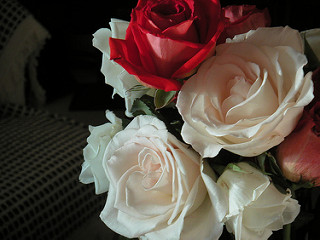

In [9]:
PIL.Image.open(str(roses[1]))

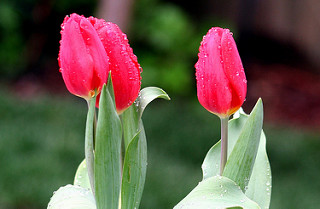

In [10]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<h4 style="color:green;">Read flowers images from disk into numpy array using OpenCV</h4>


In [11]:
flowers_images_dict={
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/8')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
    }


In [12]:
flowers_labels_dic={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers': 3,
    'tulips':4
    }

In [13]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [14]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [16]:
img=cv2.imread(str(flowers_images_dict['roses'][0])) 

In [17]:
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [18]:
img.shape

(240, 179, 3)

In [20]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [22]:
X,y=[],[]
for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dic[flower_name])

In [23]:
X=np.array(X)
y=np.array(y)

<h4 style="color:blue;">Train Test Split</h4>

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

<h4 style="color:blue;">Preprocessing:Scale images</h4>

In [31]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

<h4 style="color:blue;">Build Convolutional Neural network and train it</h4>

In [37]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)  
              

Epoch 1/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 33s 375ms/step - accuracy: 0.4123 - loss: 1.4178
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 26s 365ms/step - accuracy: 0.6137 - loss: 0.9347
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 26s 365ms/step - accuracy: 0.7220 - loss: 0.7199
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 26s 364ms/step - accuracy: 0.7639 - loss: 0.5954
Epoch 5/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 26s 367ms/step - accuracy: 0.8578 - loss: 0.4274
Epoch 6/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 44s 412ms/step - accuracy: 0.8771 - loss: 0.3481
Epoch 7/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 38s 376ms/step - accuracy: 0.9315 - loss: 0.2071
Epoch 8/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 27s 368ms/step - accuracy: 0.9687 - loss: 0.1161
Epoch 9/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 27s 377ms/step - accuracy: 0.9678 - loss: 0.1070
Epoch 10/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 26s 367ms/step - accuracy: 0.9870 - loss: 0.0494
Epoch 11/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 27s 374ms/step - accuracy: 0.9954 - loss: 0.0319
Epoch 12/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 26

In [39]:
model.evaluate(X_test_scaled,y_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7139 - loss: 2.7613


[2.7511909008026123, 0.6855263113975525]

Here we see that while train accuracy is very high(99%), the test accuracy is significantly low(66.99%) indicating overfitting. Lets make some predictions before we use data augmentation to address overfitting.

In [40]:
predictions=model.predict(X_test_scaled)
predictions

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step


array([[ -3.6405869, -21.4886   ,  18.60982  ,  -4.231878 ,  -1.1348221],
       [  2.1542876, -26.79349  ,  22.97167  , -13.98661  ,   2.0855918],
       [-12.676277 , -32.224247 ,   4.61636  ,  25.601109 ,   4.1981626],
       ...,
       [ -1.3318189, -43.23773  ,  -1.3536732,  21.991404 ,  11.966042 ],
       [ -5.2665663, -41.905228 ,   4.2189794,  22.100216 ,   5.7858977],
       [ -6.9609766, -35.550533 ,   6.965674 ,  16.092773 ,   4.827151 ]],
      dtype=float32)

In [44]:
score=tf.nn.softmax(predictions[0])

In [45]:
np.argmax(score)

2

In [46]:
y_test[0]

2

<h4 style="color:blue;">Improve Test Accuracy Using Data Augmentation</h4>

In [57]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


#### Original Image



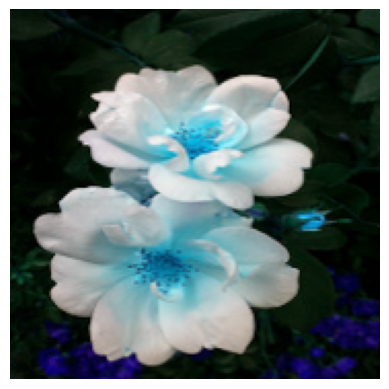

In [58]:
plt.axis('off')
plt.imshow(X[0])

##### Newly generated training sample using data augmentation



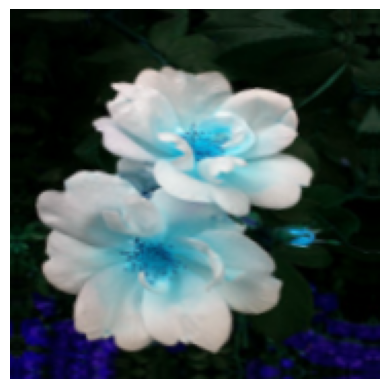

In [59]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

<h4 style="color:blue;">Train the model using data augmentation and a drop out layer</h4>

In [60]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 46s 544ms/step - accuracy: 0.3566 - loss: 1.5341
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 42s 577ms/step - accuracy: 0.5766 - loss: 0.9476
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 40s 556ms/step - accuracy: 0.6432 - loss: 0.8439
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 38s 521ms/step - accuracy: 0.6175 - loss: 0.8907
Epoch 5/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 38s 522ms/step - accuracy: 0.6404 - loss: 0.8277
Epoch 6/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 38s 520ms/step - accuracy: 0.6697 - loss: 0.8025
Epoch 7/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 38s 522ms/step - accuracy: 0.6653 - loss: 0.7698
Epoch 8/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 523ms/step - accuracy: 0.6938 - loss: 0.7410
Epoch 9/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 521ms/step - accuracy: 0.7073 - loss: 0.6926
Epoch 10/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 524ms/step - accuracy: 0.7184 - loss: 0.6787
Epoch 11/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 38s 528ms/step - accuracy: 0.7214 - loss: 0.6539
Epoch 12/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 38

In [61]:
model.evaluate(X_test_scaled,y_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7912 - loss: 0.6601


[0.7017223834991455, 0.7684210538864136]

You can see that by using data augmentaion and dropout layerr the accuracy of test set predictiions is increased to 79%